In [1]:
#! usr/bin/env python3
import praw
import pandas as pd
import datetime as dt
import sys
import string
import simplejson
import sched, time
import tweepy
from tweepy import OAuthHandler
import json
from math import log
import time
import re, string
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict
import csv
import unicodedata
from wordcloud import WordCloud 
import random



In [2]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

/Users/Devon/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
reddit = praw.Reddit(client_id='BQg2NTa99N5PVw', \
                     client_secret='dkfnSFyQc1rgi-eLY2DAszZOBQM', \
                     user_agent='Keyword', \
                     username='Devonolopous', \
                     password='Nachito17')

In [ ]:
no_subreddit = reddit.subreddit('all')

In [ ]:
hot = no_subreddit.hot(limit=1000)

In [ ]:
subreddit1 = reddit.subreddit('news')

In [ ]:
news_subreddit = subreddit1.hot(limit=1000)

In [ ]:
subreddit2 = reddit.subreddit('videogames')

In [ ]:
games_subreddit = subreddit2.hot(limit=1000)

In [ ]:
#t = sched.scheduler(time.time, time.sleep)
dict1 = {'title':[],
       'subreddit':[],
       'score':[],
       'created':[],
       'body':[]}
dict2 = {'title':[],
       'subreddit':[],
       'score':[],
       'created':[],
       'body':[]}
dict3 = {'title':[],
       'subreddit':[],
       'score':[],
       'created':[],
       'body':[]}
#def mahfunc(si):
    #count = 0
    #count = count + 1
    #t.enter(60, 1, mahfunc, (si,))
for submission in news_subreddit:
    if submission.title not in dict1['title']:
        dict1['title'].append(submission.title)
        dict1['subreddit'].append(submission.subreddit)
        dict1['score'].append(submission.score)
        dict1['created'].append(submission.created)
        dict1['body'].append(submission.selftext)
for submission in games_subreddit:
    if submission.title not in dict2['title']:
        dict2['title'].append(submission.title)
        dict2['subreddit'].append(submission.subreddit)
        dict2['score'].append(submission.score)
        dict2['created'].append(submission.created)
        dict2['body'].append(submission.selftext)
for submission in hot:
    if submission.title not in dict3['title']:
        dict3['title'].append(submission.title)
        dict3['subreddit'].append(submission.subreddit)
        dict3['score'].append(submission.score)
        dict3['created'].append(submission.created)
        dict3['body'].append(submission.selftext)
#print(count)
dd = {}
for d in (dict1, dict2, dict3):
    for k, v in d.items():
        dd.setdefault(k, []).append(v)
    

    #df  = pd.DataFrame([dict], columns=dict.keys())
    #df_red = pd.concat([df_red, df], axis =0).reset_index()
    #return (dict1, dict2, dict3)
    #t.enter(60, 1, mahfunc, (t,))
    #t.run()

In [ ]:
for k, v in dd.items():
    tmp=[]
    for i in v:
        if isinstance(i,list):
            tmp.extend(i)
        else:
            tmp.append(i)
    dd[k] = tmp
print(dd)

In [ ]:
df  = pd.DataFrame.from_dict(dd, orient='index').transpose()

In [ ]:
df

In [ ]:
df = pd.to_csv('dframe1.csv')

In [ ]:
df.columns.unique()

In [ ]:
def get_time(created):
    return dt.datetime.fromtimestamp(created)
df['created'] = df['created'].apply(get_time)

In [ ]:
df

In [ ]:
df['subreddit'] = df['subreddit'].apply(lambda x: x.display_name)

In [ ]:
df = pd.get_dummies(df, columns=['subreddit'], drop_first=True)

In [ ]:
X = df['title'] # Try adding additional features!
y = df['score']

In [ ]:
from twython import Twython

In [3]:
import sys
sys.path.append(".")
consumer_key = '5rLFEl5YqSKIUShhVGP0ohLLz'
consumer_secret = 'OTBI4gTnHPPf0TT7q56iHPUuSJRPcyHnbGphVPLNwxVG853Md0'
access_token = '2981818571-ecOZsiZctDbuE7MupiZeBBXOIONLPaYPXmWvG5N'
access_token_secret = 'sjXtQZSnZ23QkGUEPmBh7KYVok9PTL4ipEot0maEYUIAS'

In [ ]:
twitter = Twitter(auth = OAuth(access_key,
                  access_secret,
                  consumer_key,
                  consumer_secret))

In [ ]:
def serialize(obj):
    """JSON serializer for objects not serializable by default json code"""

    if isinstance(obj, date):
        serial = obj.isoformat()
        return serial

    if isinstance(obj, time):
        serial = obj.isoformat()
        return serial

    return obj.__dict__


serialize(apexlist)

json.dumps(myObj, default=serialize)


In [4]:
def twit(value):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)
    searchQuery = 'Fortnite OR fortnite OR FORTNITE OR #Fortnite OR #fortnite or #FORTNITE'
    csvFile = open('fortnitefinal.csv', 'a')
    csvWriter = csv.writer(csvFile)
    
    while True:
        try:
            for tweet in tweepy.Cursor(api.search, q=searchQuery +" -filter:retweets", tweet_mode='extended', count=10000, 
            lang='en', retry_count = 5, retry_delay = 5, since='2018-01-01').items():
                csvWriter.writerow([tweet.created_at, tweet.full_text])
                unicodedata.normalize('NFKD', tweet.full_text).encode('ascii', 'ignore')
                print(tweet.created_at, tweet.full_text)
                
            
        except tweepy.error.TweepError as e:
            print(str(e))
            
        time.sleep(value)
    csvFile.close()

In [ ]:
twit(1)

In [ ]:
df_tweett['text'] = df_tweett['text'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore'))


In [6]:
import csv

path =  '/Users/Devon/Python_Files/training.1600000.processed.noemoticon.csv'

with open(path, 'r', encoding='utf-8', errors='ignore') as infile, open(path + 'final.csv', 'w') as outfile:
    inputs = csv.reader(infile)
    output = csv.writer(outfile)

    for index, row in enumerate(inputs):
         # Create file with no header
        if index == 0:
            continue
        output.writerow(row)

In [7]:
data = pd.read_csv('training.1600000.processed.noemoticon.csvfinal.csv',
                   error_bad_lines=False, encoding='utf-8')
data.columns = ['target', 'id','date','flag', 'user', 'text']
data.head(2)
# get text and matching label columns
data = data.drop(['id','user', 'flag'],axis=1)
data.head(10)

,target,date,text
0,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
1,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
2,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
3,0,Mon Apr 06 22:20:00 PDT 2009,@Kwesidei not the whole crew
4,0,Mon Apr 06 22:20:03 PDT 2009,Need a hug
5,0,Mon Apr 06 22:20:03 PDT 2009,@LOLTrish hey long time no see! Yes.. Rains a...
6,0,Mon Apr 06 22:20:05 PDT 2009,@Tatiana_K nope they didn't have it
7,0,Mon Apr 06 22:20:09 PDT 2009,@twittera que me muera ?
8,0,Mon Apr 06 22:20:16 PDT 2009,spring break in plain city... it's snowing
9,0,Mon Apr 06 22:20:17 PDT 2009,I just re-pierced my ears


In [8]:
negatives = data['target'][data.target == 0]
positives = data['target'][data.target == 4]
print('number of positive tagged sentences is:  {}'.format(len(positives)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('total length of the data is:            {}'.format(data.shape[0]))

number of positive tagged sentences is:  800000
number of negative tagged sentences is: 799998
total length of the data is:            1599998


In [9]:
def word_count(sentence):
    return len(sentence.split())
    
data['word count'] = data['text'].apply(word_count)
data.head(3)

,target,date,text,word count
0,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,18
1,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,10
2,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",21


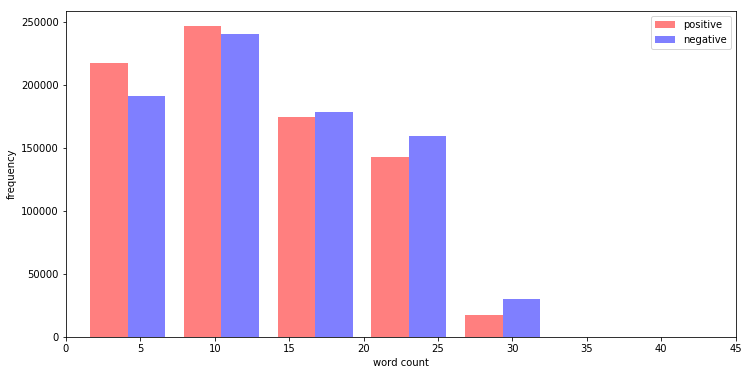

In [10]:
x = data['word count'][data.target == 4]
y = data['word count'][data.target == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [11]:
every_word = []
for line in list(data['text']):
    words = line.split()
    for word in words:
        every_word.append(word.lower())
        
Counter(every_word).most_common(20)

[('i', 746603),
 ('to', 560313),
 ('the', 518736),
 ('a', 376421),
 ('my', 312847),
 ('and', 295674),
 ('you', 237765),
 ('is', 231086),
 ('for', 214051),
 ('in', 209960),
 ('it', 191053),
 ('of', 182599),
 ('on', 161592),
 ('so', 145770),
 ('have', 143295),
 ('that', 128775),
 ('me', 128490),
 ("i'm", 127616),
 ('but', 124676),
 ('just', 124453)]

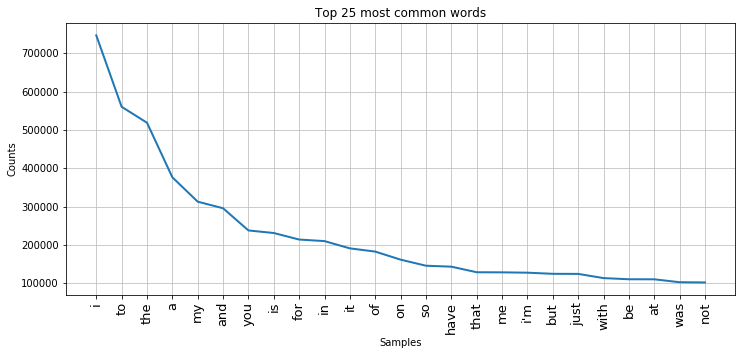

Text(0.5, 1.0, 'log-log plot of words frequency')

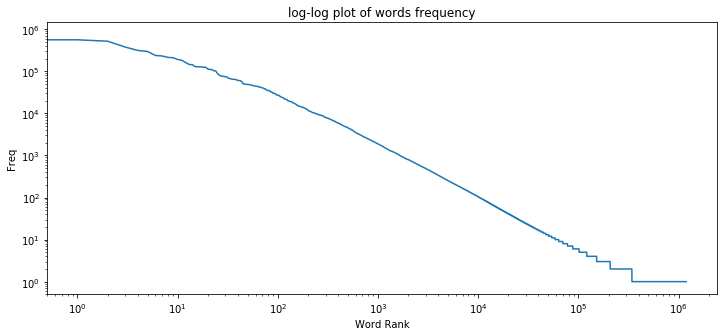

In [12]:
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(every_word)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(every_word).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [ ]:
import csv

In [ ]:
data = []
with open('tweets.20150430-223406.json') as f:
    for line in f:
        data.append(json.loads(line))

In [ ]:
df_data = pd.DataFrame(data)
df_data.to_csv('tweeter.csv', index=False)

In [ ]:
f = r'C:\Macintosh HD⁩\Users⁩\Devon⁩\python_files⁩\apexres.csv'
data = f.decode('utf-8').splitlines()

# Open the file for writing
with open("tmp.csv", "w") as csv_file:
    # Create the writer object with tab delimiter
    writer = csv.writer(csv_file)
    for line in data:
        # Writerow() needs a list of data to be written, so split at all empty spaces in the line 
        writer.writerow(re.split('\s+',line))

In [31]:
col_names=['date','text']
# read csv
df_og = pd.read_csv('fortnitefinal.csv', names=col_names, low_memory=False)
# check head
df_og.head(50)

,date,text
0,2019-08-08 21:15:06,Anybody have a og acc I can use or renegade or...
1,2019-08-08 21:14:12,"My Fortnite Season 9 recap, pretty cool how @E..."
2,2019-08-08 21:11:29,Congratulations to drsupat00pa!!!!\n\nYou have...
3,2019-08-08 21:09:51,Account for sale or trade 170 skins black knig...
4,2019-08-08 21:08:08,"Ok so where tf is fortntie going to, like we c..."
5,2019-08-08 21:06:00,anyone got a wonder skin code or can help me g...
6,2019-08-08 20:57:51,Live!!! Drop a comment and/or ask me questions...
7,2019-08-08 20:57:37,#Fortnite\nRemove the mech\nOr\nShow its locat...
8,2019-08-08 20:55:45,Left @RiZeAllianc3 just wasn’t the same anymor...
9,2019-08-08 20:55:34,Check out(https://t.co/jqLgcK3g3k)#twitch #for...


In [ ]:
dfToList = df_tweett['text'].tolist()

dfList = list(df_tweett['text'])

dfValues = df_tweett['text'].values

In [ ]:
print(dfValues)

In [ ]:
df_tweett['text'] = df_tweett['text'].apply(lambda x: urllib.parse.parse_qs(x.decode()))

In [ ]:
df_tweett.head()

In [14]:
import unicodedata
def prTweet(tweets):
    tweets = re.sub(r'\&\w*;', '', str(tweets))
    tweets = re.sub('@[^\s]+', '', tweets)
    tweets = re.sub(r'\$\w*', '', tweets)
    tweets = tweets.lower()
    tweets = re.sub(r'https?:\/\/.*\/\w*', '', tweets)
    tweets = re.sub(r'#\w*', '', tweets)
    tweets = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweets)
    tweets = re.sub(r'\b\w{1,2}\b', '', tweets)
    tweets = re.sub(r'\s\s+', ' ', tweets)
    tweets = tweets.lstrip(' ')
    tweets = ''.join(c for c in unicodedata.normalize('NFC', tweets) if c <= '\uFFFF')
    return tweets

In [ ]:
df_tweett['text'] = df_tweett['text'].apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))


In [17]:
df_tweett['text'] = df_tweett['text'].apply(prTweet)
df_tweett['text'].head(25)

0     anybody have acc can use renegade ghoul galaxy...
1     fortnite season recap pretty cool how can eith...
2     congratulations drsupat00pa you have hours cla...
3     account for sale trade 170 skins black knight ...
4     where fortntie going like cant have normal fig...
5     anyone got wonder skin code can help get please  
6        live drop comment and ask questions  link bio 
7     \nremove the mech show its location the map an...
8     left just wasn’ the same anymore for any orgs ...
9                                            check out 
10     buy trade looking for galaxy have accounts st...
11    looking for competitive trio play with regular...
12                        aim assist wya this bug somn 
13    think you got what takes join drop your portfo...
14    rainbow six siege montage finally out check ou...
15    cap gonna needs physical help after this strea...
16                             what did fans like less 
17    new highground retake nah ⭐️ polo effortle

In [ ]:
df_tweett['text'] = str(df_tweett['text'], "utf8", errors="ignore")

In [ ]:
df_tweet.head(30)

In [18]:
games_words = []
for line in list(df_tweett['text']):
    words = line.split()
    for word in words:
        games_words.append(word.lower())

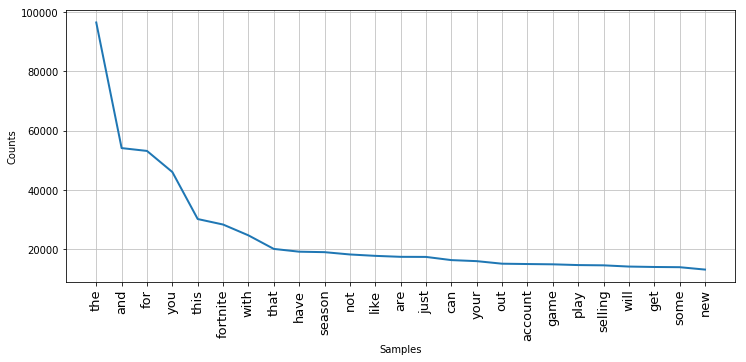

Text(0.5, 0, 'Word Rank')

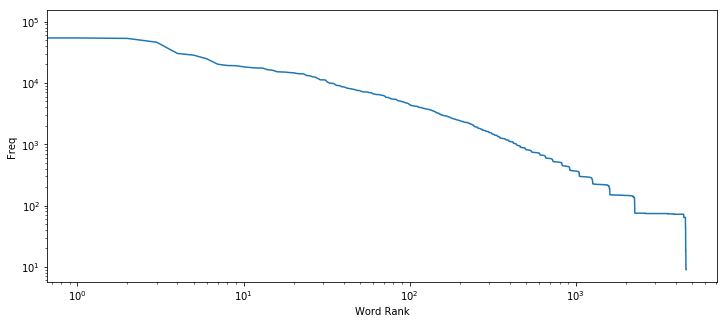

In [19]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(games_words)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(games_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [21]:
def textClean(raw_text):
    nop = [char for char in list(raw_text) if char not in string.punctuation]
    nop = ''.join(nop)
    return [word for word in nop.lower().split() if word.lower() not in stopwords.words('english')]
def removeW(word_list):
    remove = ['...','“','”','’','…','fortnite']
    return [w for w in word_list if w not in remove]

In [22]:
df_tweett = df_tweett.copy()
df_tweett['tokens'] = df_tweett['text'].apply(textClean) # tokenize style 1
df_tweett['no_fortnite'] = df_tweett['tokens'].apply(removeW) #tokenize style 2
df_tweett.head()

,date,text,tokens,no_fortnite
0,2019-08-08 21:15:06,anybody have acc can use renegade ghoul galaxy...,"[anybody, acc, use, renegade, ghoul, galaxy, p...","[anybody, acc, use, renegade, ghoul, galaxy, p..."
1,2019-08-08 21:14:12,fortnite season recap pretty cool how can eith...,"[fortnite, season, recap, pretty, cool, either...","[season, recap, pretty, cool, either, make, le..."
2,2019-08-08 21:11:29,congratulations drsupat00pa you have hours cla...,"[congratulations, drsupat00pa, hours, claim, g...","[congratulations, drsupat00pa, hours, claim, g..."
3,2019-08-08 21:09:51,account for sale trade 170 skins black knight ...,"[account, sale, trade, 170, skins, black, knig...","[account, sale, trade, 170, skins, black, knig..."
4,2019-08-08 21:08:08,where fortntie going like cant have normal fig...,"[fortntie, going, like, cant, normal, fight, g...","[fortntie, going, like, cant, normal, fight, g..."


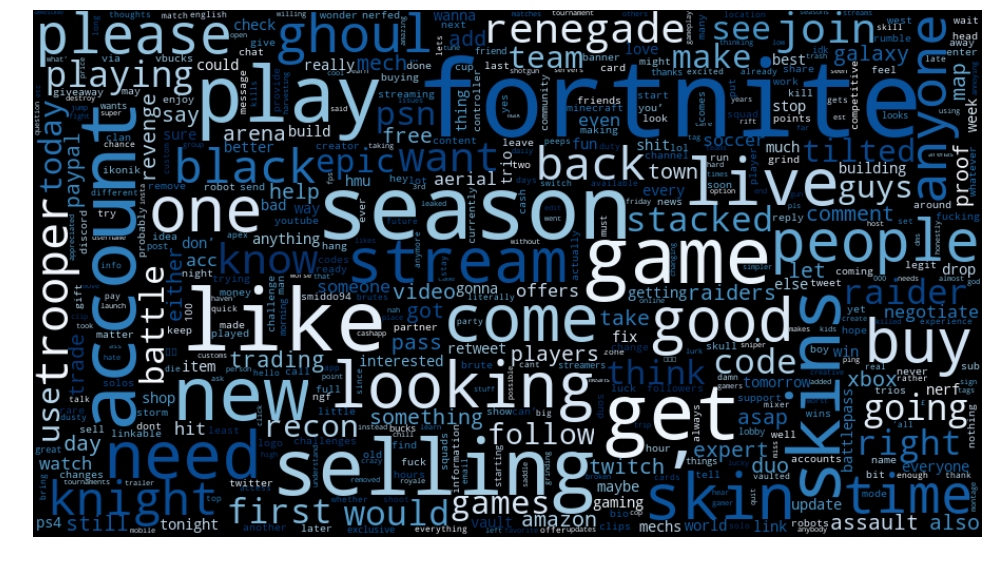

In [23]:
every_word = []
for line in df_tweett['tokens']:
    every_word.extend(line)
    
word_freq = Counter(every_word)

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(word_freq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
bow_transformer = CountVectorizer(analyzer=textClean).fit(df_tweett['text'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
messages_bow = bow_transformer.transform(df_tweett['text'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
tfidf_transformer = TfidfTransformer().fit(messages_bow)

4532
Shape of Sparse Matrix:  (148677, 4532)
Amount of Non-Zero occurences:  1765291


In [25]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['season']])

3.2081668041983527


In [26]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(148677, 4532)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2)

In [28]:
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [29]:
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }
# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)
# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 275.4min finished



Best Model: 0.755593 using {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.737886 Stdev:(0.001294) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.752701 Stdev:(0.000978) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.737196 Stdev:(0.001307) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.747994 Stdev:(0.001013) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.738184 Stdev:(0.000838) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.755593 Stdev:(0.001012) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.727877 Stdev:(0.001029) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.741386 Stdev:(0.001092) with: {'bow__ngram_range'

In [30]:
joblib.dump(grid, "fortnite_sentiment.pkl")

model_NB = joblib.load("fortnite_sentiment.pkl" )
y_preds = model_NB.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.7575625


confusion matrix: 
 [[123694  36462]
 [ 41118 118726]]


              precision    recall  f1-score   support

           0       0.75      0.77      0.76    160156
           4       0.77      0.74      0.75    159844

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [32]:
tweet_preds = model_NB.predict(df_og['text'])
df_tweet_preds = df_og.copy()
df_tweet_preds['predictions'] = tweet_preds
df_tweet_preds.shape

(148710, 3)

In [33]:
index = random.sample(range(tweet_preds.shape[0]), 20)
for text, sentiment in zip(df_tweet_preds.text[index],
                           df_tweet_preds.predictions[index]):
    print (sentiment, '--', text, '\n')

4 -- Anyone want to add me on fortnite just want some more people added to my friends list and we can have some games I have played S3-S9 I’m good at mobile! Comment down below you epic so I can add you or feel free to add me my epic: ItzMahtab        #Fortnite #Fortniteleaks 

4 -- ⚡️ NEW: Got strong Swedish #writing skills and knowledge of #LeagueOfLegends, #Dota2, #CSGO, #Overwatch, #RocketLeague, #Fortnite or #PUBG? 🤔

💼 Swedish Esports Writers
🏢 Wiget Media
🌎 Remote (Anywhere)
📃 Freelance
🎚️ Entry
🏷️ Writing

👀👇!

https://t.co/L5AZaXBbeC 

0 -- What should I change my epic name too? (or keep it the same) #Fortnite 

4 -- Soooo #Fortnite took out the free challenges, meaning you kind of either buy the pass or get no way to earn extra Battle Stars. That is really lame. 

0 -- The new DJ Yonder is such a underrated skin he’s like my best skin in the battle pass espically with his mask or whatever when it comes off 🔥🔥🔥🔥#Fortnite #FortniteBattleRoyale #FortniteSeason10 

4 -- Would you

In [34]:
pos = df_tweet_preds.predictions.value_counts()[4]
neg = df_tweet_preds.predictions.value_counts()[0]
print('Model predictions: Positives - {}, Negatives - {}'.format(neg,pos))
# save dataframe with appended preditions 
df_tweet_preds.to_pickle('fortnite_predicts_df.p')

Model predictions: Positives - 99657, Negatives - 49053


In [ ]:
for row in df.columns:
    tlist.append(dd['title'])

In [ ]:
tlist

In [ ]:
import nltk
nltk.download()

In [ ]:
d = []
for k, v in dd.items():
    for l in v:
        d.append(v)

In [ ]:
tokens = [f for f in d.split()]
print(tokens)

In [ ]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)